In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%time
data_root = os.path.join("/", "Users", "ravinderboparai", "Documents", "DSA", "UC_Caseload_Model")
uc_path =os.path.join(data_root, "uc_eco_timeseries.csv") 

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 17.9 µs


In [4]:
uc_data = pd.read_csv(uc_path, header=None)
uc_data1 = uc_data.set_axis(['date', 'customers', 'unemployment','CPI','FTSE 100','GBP/USD'], axis=1, inplace=True)   

In [5]:
uc_data

,date,customers,unemployment,CPI,FTSE 100,GBP/USD
0,2009-02-01,7944336,7.1,3.2,3830.09,1.4477
1,2009-03-01,7986464,7.3,2.9,3926.14,1.4290
2,2009-04-01,8024625,7.6,2.3,4243.71,1.4329
3,2009-05-01,8134244,7.8,2.2,4417.94,1.4781
4,2009-06-01,8171659,7.9,1.8,4249.21,1.6178
...,...,...,...,...,...,...
142,2020-12-01,11251923,5.1,0.6,6460.52,1.3325
143,2021-01-01,11255285,5.0,0.7,6407.46,1.3672
144,2021-02-01,11211413,4.9,0.4,6483.43,1.3713
145,2021-03-01,11211042,4.8,0.7,6713.63,1.3939


In [6]:
uc_data.shape

(147, 6)

0 date
1 customers
2 unemployment
3 CPI
4 FTSE 100
5 GBP/USD


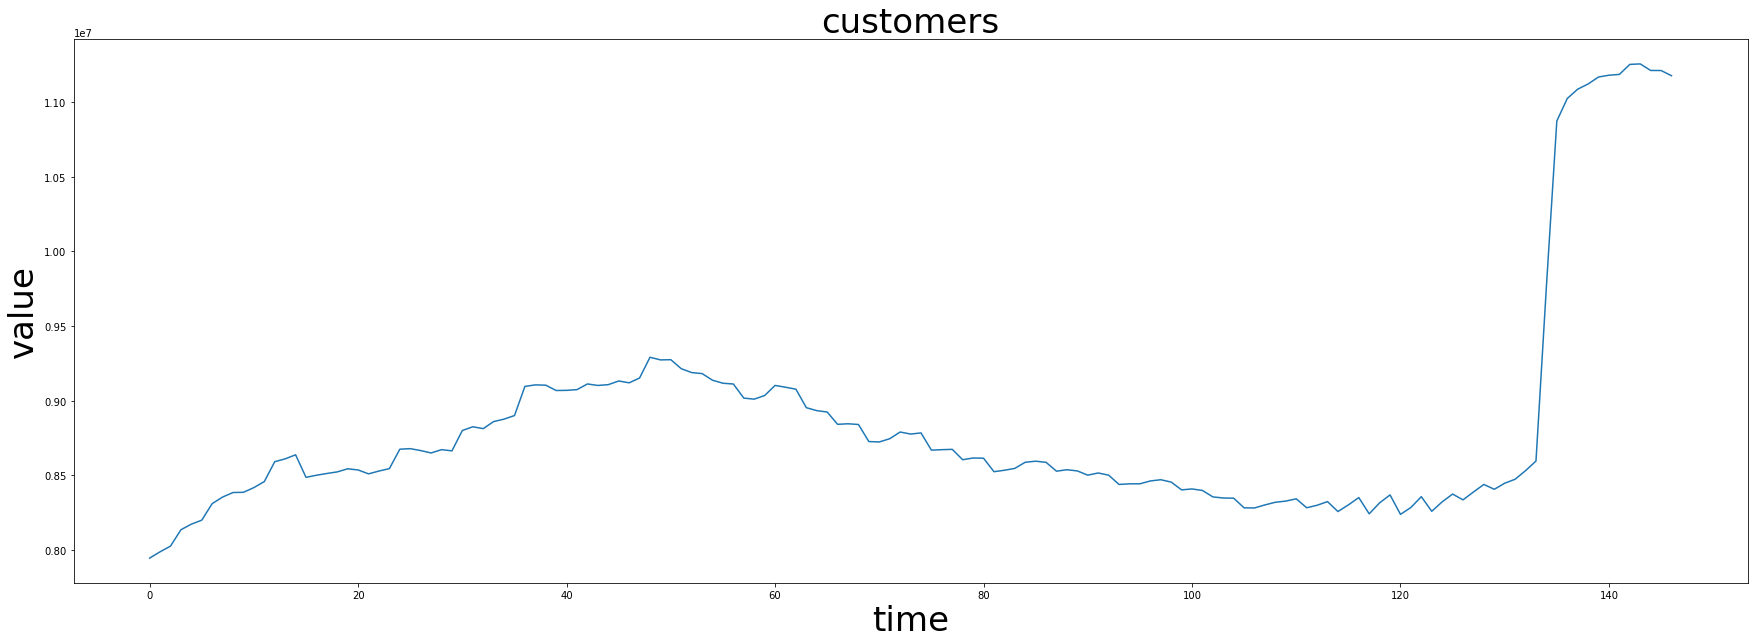

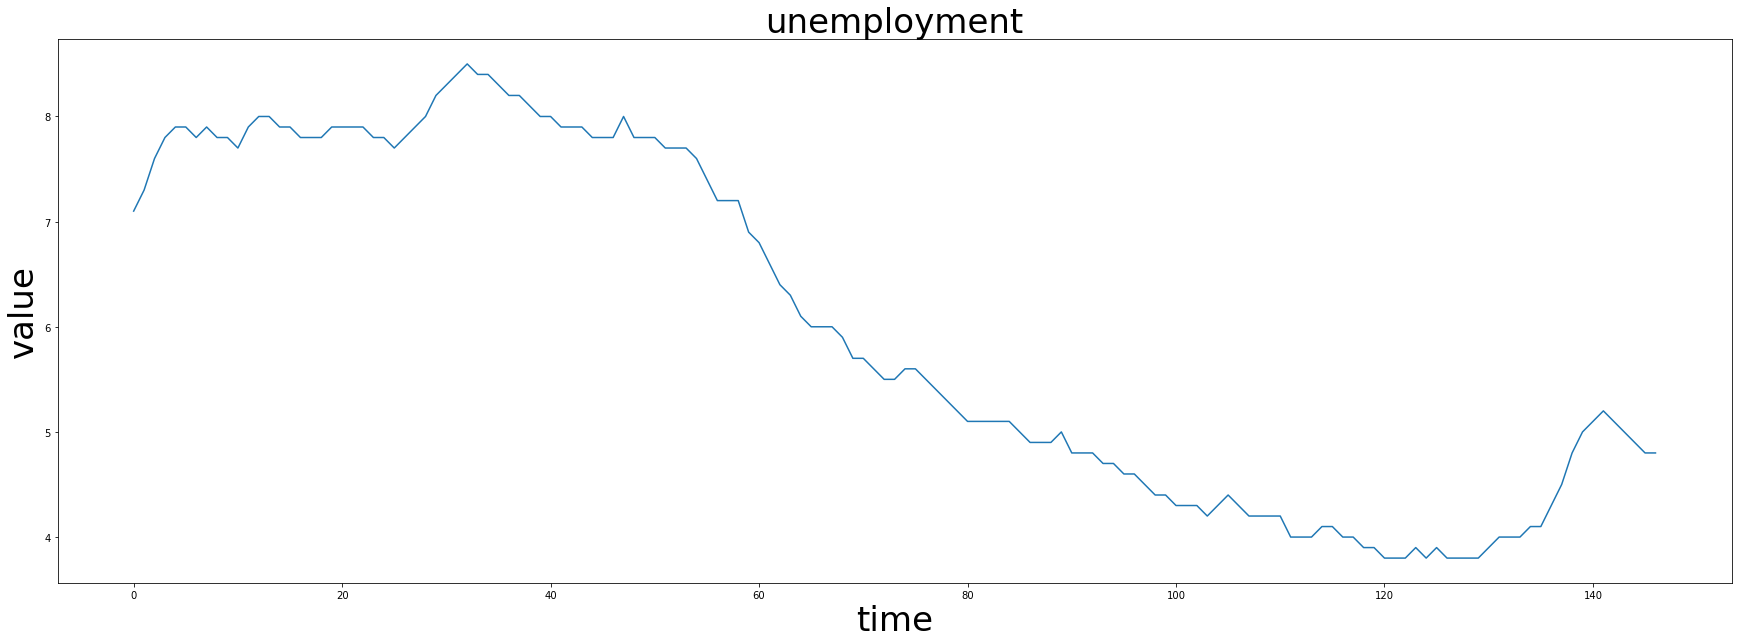

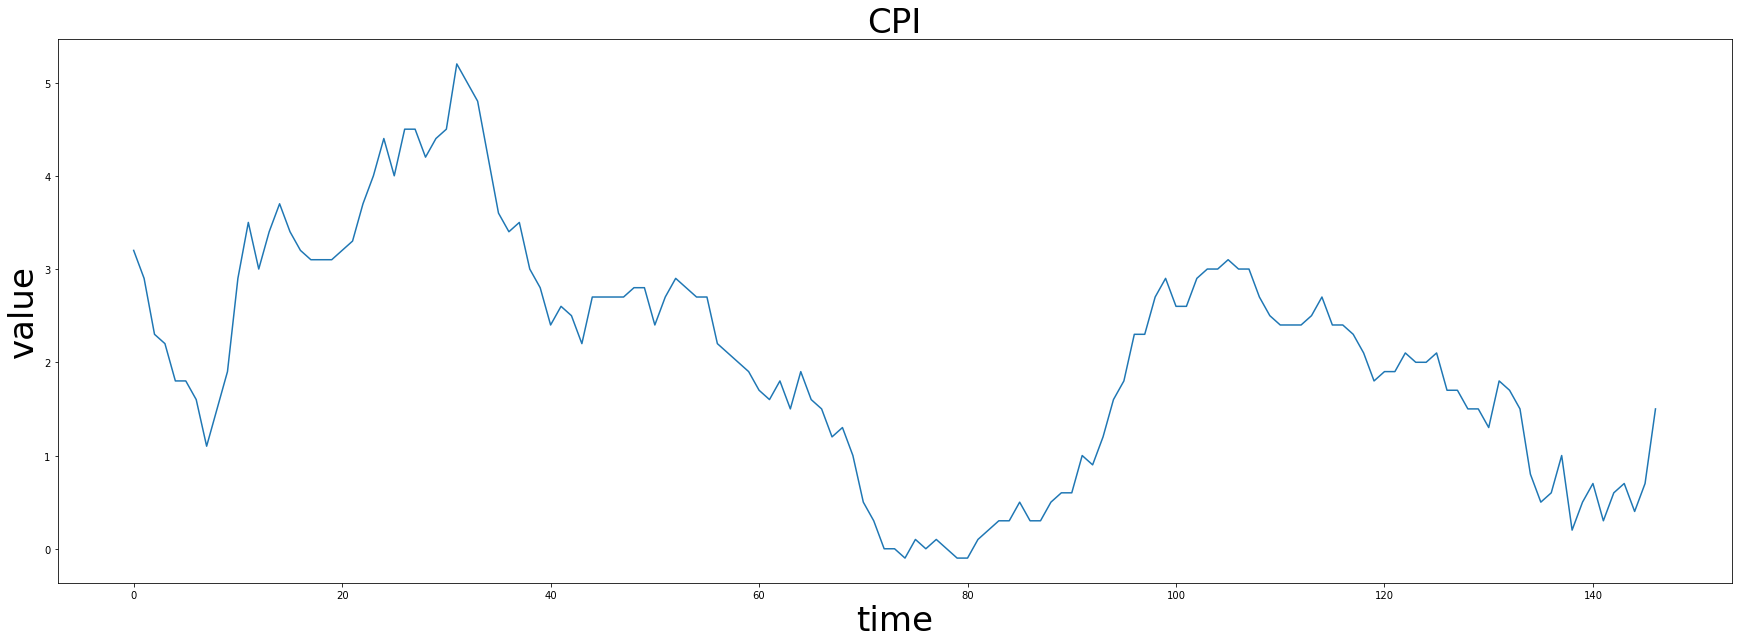

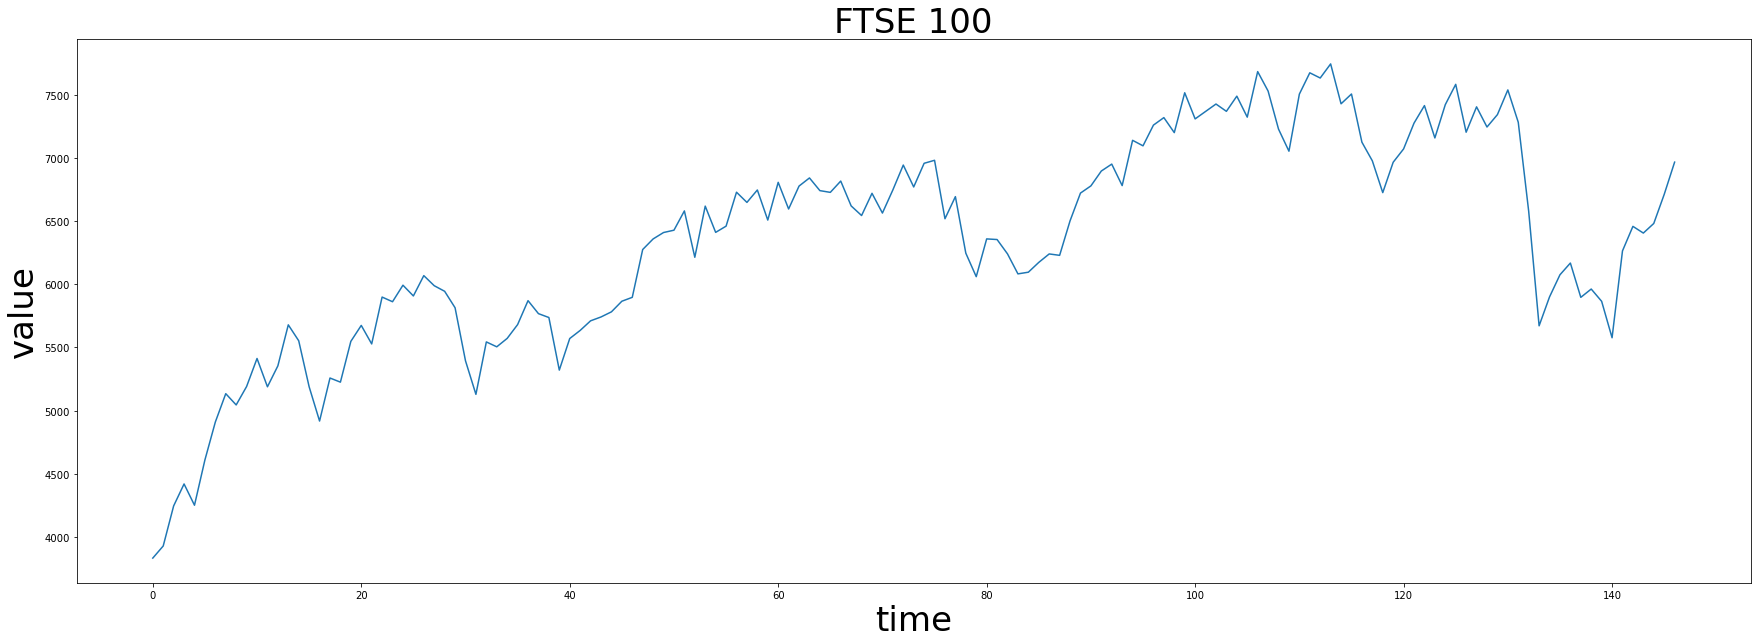

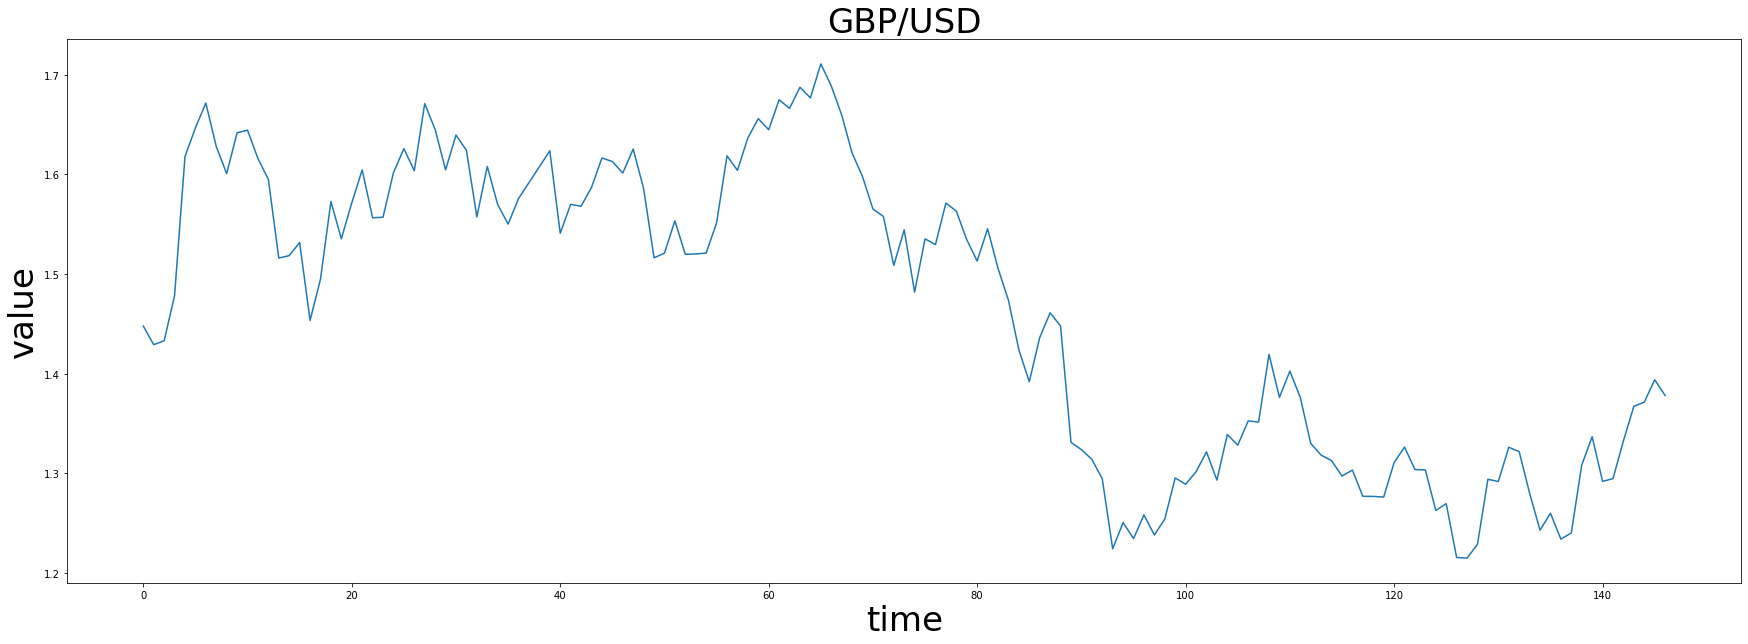

In [7]:
for ind, column in enumerate(uc_data.columns):
    print(ind, column)
    if ind != 0:
        fig, ax = plt.subplots(figsize=(30, 10))
        uc_data[column].head(100000).plot(ax=ax)
        ax.set_xlabel('time',  fontsize=34)
        ax.set_ylabel('value',  fontsize=34)
        ax.set_title(column, fontsize=34)
        

In [8]:
uc_data[["date"]] = uc_data[["date"]].apply(pd.to_datetime)
uc_data = uc_data.set_index('date')
uc_data = uc_data.sort_index()

In [9]:
training_data = uc_data[:131]
training_data.shape

(131, 5)

In [10]:
testing_data = uc_data[131:]
testing_data.shape

(16, 5)

In [11]:
training_data

,customers,unemployment,CPI,FTSE 100,GBP/USD
date,,,,,
2009-02-01,7944336,7.1,3.2,3830.09,1.4477
2009-03-01,7986464,7.3,2.9,3926.14,1.4290
2009-04-01,8024625,7.6,2.3,4243.71,1.4329
2009-05-01,8134244,7.8,2.2,4417.94,1.4781
2009-06-01,8171659,7.9,1.8,4249.21,1.6178
...,...,...,...,...,...
2019-08-01,8334445,3.8,1.7,7207.18,1.2155
2019-09-01,8387112,3.8,1.7,7408.21,1.2149
2019-10-01,8437700,3.8,1.5,7248.38,1.2287


In [12]:
testing_data

,customers,unemployment,CPI,FTSE 100,GBP/USD
date,,,,,
2020-01-01,8472665,4.0,1.8,7286.01,1.3261
2020-02-01,8530153,4.0,1.7,6580.61,1.3217
2020-03-01,8594366,4.0,1.5,5671.96,1.2800
2020-04-01,9763440,4.1,0.8,5901.21,1.2429
2020-05-01,10872722,4.1,0.5,6076.60,1.2599
2020-06-01,11023505,4.3,0.6,6169.74,1.2339
2020-07-01,11085884,4.5,1.0,5897.76,1.2401
2020-08-01,11120881,4.8,0.2,5963.57,1.3082
2020-09-01,11167422,5.0,0.5,5866.10,1.3367


In [13]:
print(training_data.shape, testing_data.shape)

(131, 5) (16, 5)


In [14]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
y_train = training_data['customers'].to_numpy(copy=True, dtype=str)
y_test = testing_data['customers'].to_numpy(copy=True, dtype=str)

In [16]:
ploting_data = pd.DataFrame(testing_data['customers'])

In [17]:
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(131, 5) (16, 5) (131,) (16,)


In [19]:
reg = RandomForestRegressor()

In [20]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
preds = reg.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, preds)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [23]:
y_test

array(['8472665', '8530153', '8594366', '9763440', '10872722', '11023505',
       '11085884', '11120881', '11167422', '11179528', '11184899',
       '11251923', '11255285', '11211413', '11211042', '11176240'],
      dtype='<U21')

In [24]:
preds

array([8463121.16, 8525484.78, 8591948.49, 9249657.89, 9249657.89,
       9249657.89, 9249657.89, 9249657.89, 9249657.89, 9249657.89,
       9249657.89, 9250337.19, 9250482.61, 9249570.96, 9237553.8 ,
       9237553.8 ])

In [25]:
mse

2724568881844.59

In [26]:
testing_data['predictions'] = preds

/var/folders/4f/swlbk19d0_sc0g2xltrc2ngw0000gp/T/ipykernel_5300/2324531556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['predictions'] = preds


In [27]:
y_test

array(['8472665', '8530153', '8594366', '9763440', '10872722', '11023505',
       '11085884', '11120881', '11167422', '11179528', '11184899',
       '11251923', '11255285', '11211413', '11211042', '11176240'],
      dtype='<U21')

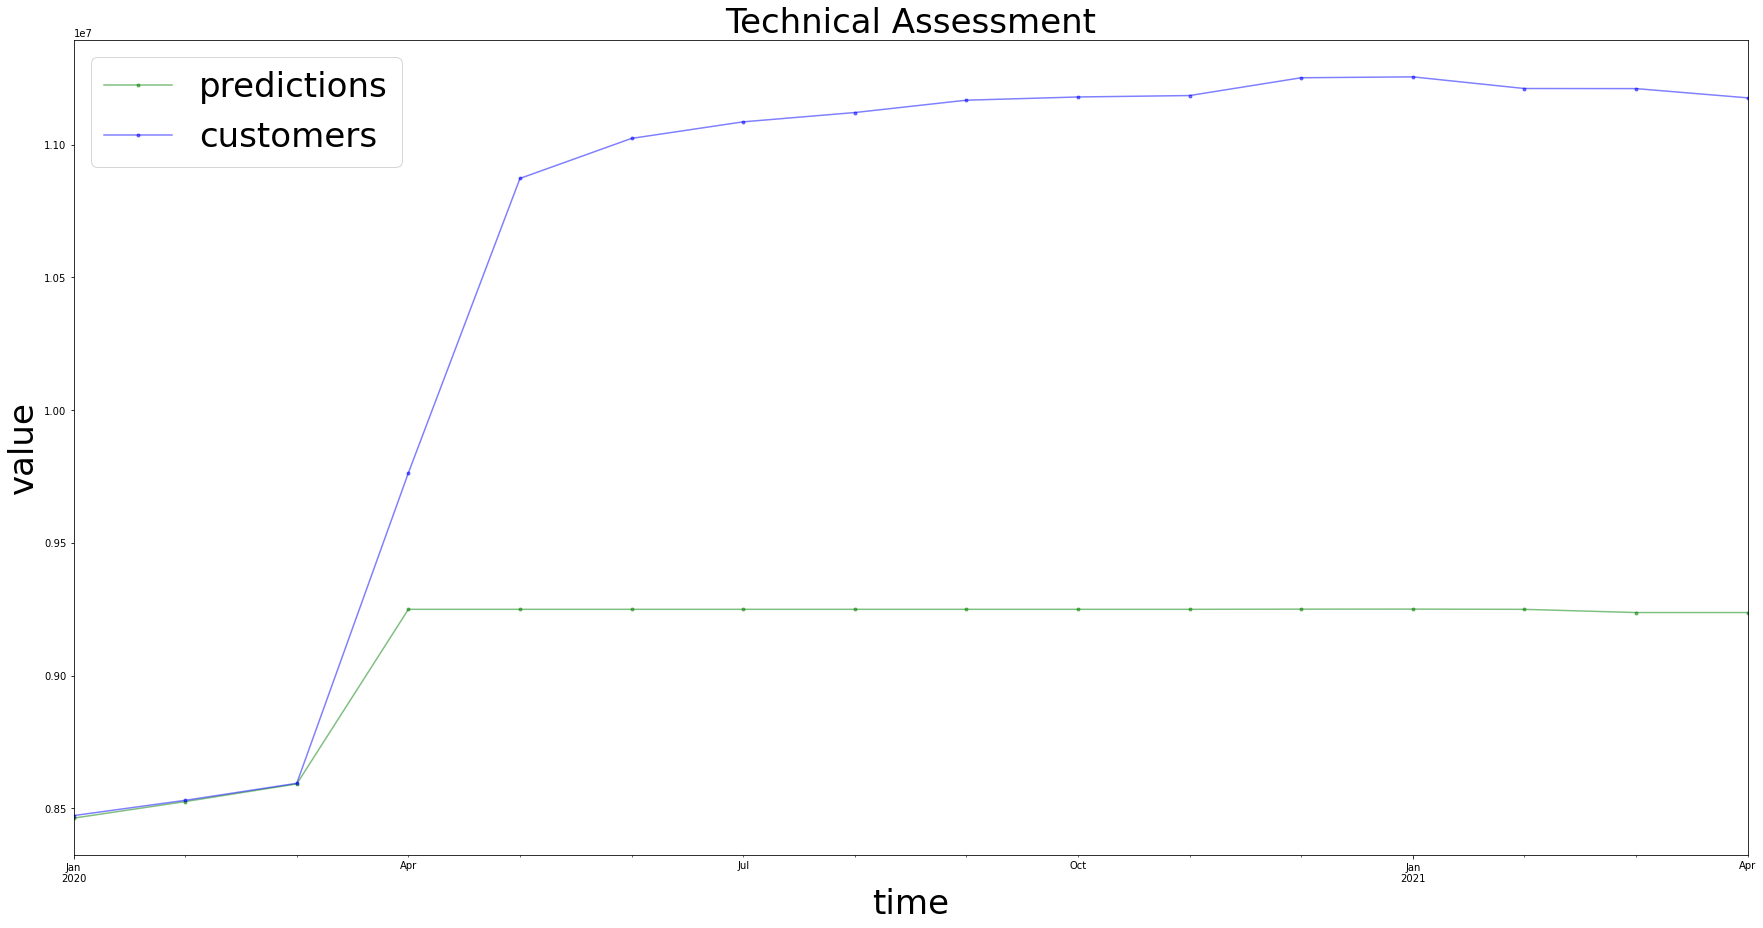

In [28]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['customers'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('time',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)

In [42]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


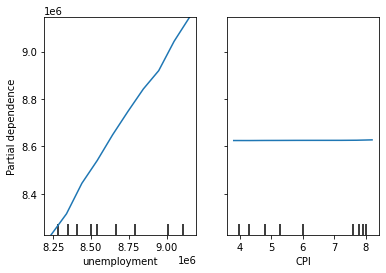

In [56]:
my_plots = plot_partial_dependence(reg,       
                                   features=[0, 1], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['unemployment', 'CPI'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis